<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/ASSGNMNT_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [1]:
##
### https://web.stanford.edu/~hastie/ElemStatLearn/

'''Prostate data info

Predictors (columns 1--8)

lcavol
lweight
age
lbph
svi
lcp
gleason
pgg45

outcome (column 9)

lpsa

train/test indicator (column 10)

This last column indicates which 67 observations were used as the 
"training set" and which 30 as the test set, as described on page 48
in the book.

There was an error in these data in the first edition of this
book. Subject 32 had a value of 6.1 for lweight, which translates to a
449 gm prostate! The correct value is 44.9 gm. We are grateful to
Prof. Stephen W. Link for alerting us to this error.

The features must first be scaled to have mean zero and  variance 96 (=n)
before the analyses in Tables 3.1 and beyond.  That is, if x is the  96 by 8 matrix
of features, we compute xp <- scale(x,TRUE,TRUE)

'''
import pandas as pd
import altair as alt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from functools import reduce

def repeatedly(f, n): 
  def composition(f,g):
    # "f after g" 
    return lambda x: f(g(x))
  return reduce(lambda ma, mma: composition(ma, mma), [f]*n)

df = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data", 
                 delim_whitespace=True).select_dtypes(include=['float', 'int'])

sc = StandardScaler() # Thanks for Mark for this bit

df_normalized = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

df_normalized['ones'] = np.ones(df.shape[0])

df_normalized.head()


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,ones
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.533318,1.0
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.299712,1.0
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155,-2.299712,1.0
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.299712,1.0
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-1.834631,1.0


In [0]:
def LR(X, y, testsize=0.3): 
  #print(X.shape, y.shape)
  # X is a dataframe with arbitrary features
  # y is a dataframe with one feature
  # they are each sliced from the same master df. 
  
  # Split into test and train datasets
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=testsize, random_state=42)

  # fit model using train datasets
  model = LinearRegression()
  model.fit(X_train, Y_train)

  # Create new predictions using x_test
  y_pred = model.predict(X_test)

  # Measure Accuracy using y_test and y_pred
  RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
  R2 = r2_score(Y_test, y_pred)

  print('RMSE is {}'.format(RMSE))
  print('R^2 is {}'.format(R2))

  print("coefficients: ", model.coef_)
  print("intercepts: ", model.intercept_)
  
  return {'RMSE': RMSE, 'R2': R2, 'coefficients': model.coef_, 'intercept': model.intercept_}

In [3]:
X = df_normalized[['ones', 'lweight']]
y = df_normalized.lpsa

from_sklearn = LR(X.drop('ones', axis=1),y)


RMSE is 0.8453364429009119
R^2 is 0.19086153418651863
coefficients:  [0.4165919]
intercepts:  -0.007534350939092119


In [0]:
class GDOLSR: 
  def __init__(self, df, feat, target, epochs=1000, gamma=0.017):
    self.df = df
    self.X = df[['ones', feat]]
    self.y = df[target]
    self.theta = np.ones(X.shape[1])[:, np.newaxis]
    self.epochs = epochs # this code really doesn't use this value for anything at all
    self.gamma = gamma
    self.N = self.X.shape[1]
    self.feat = feat

  def yhat(self, theta): 
    # long form: X.ones1 * theta[0] + X.lcavol * theta[1]
    return pd.DataFrame(np.matmul(self.X, theta))

  def cost(self, theta): 
    sqrd_residuals = (self.y[:, np.newaxis] - self.yhat(theta)) ** 2
    return ((1/self.N) * sqrd_residuals.sum().values)[0]

  def del_cost_0(self, theta): 
    return np.divide(-2,self.N) * (self.y[:, np.newaxis] - self.yhat(theta)).sum()

  def del_cost_1(self, theta): 
    return np.divide(-2,self.N) * (self.X[self.feat][:, np.newaxis] * (self.y[:, np.newaxis] - self.yhat(theta))).sum()

  # algorithm: repeat theta_k <- theta_k - alpha * del H / del theta_k `epochs` times, for k in range(len(theta))

  def update(self, theta): 
    return [theta[0] - self.gamma * self.del_cost_0(theta).values, theta[1] - self.gamma * self.del_cost_1(theta).values]

  def update_25x(self, the):
    return repeatedly(self.update, 25)(the)
  
  def update_100x(self, the): 
    return repeatedly(self.update_25x, 4)(the)


test = GDOLSR(df_normalized, 'lweight', 'lpsa', gamma=0.0015)

theta_from_sklearn = [from_sklearn['intercept'], from_sklearn['coefficients'][0]]


np.testing.assert_almost_equal(test.cost(theta_from_sklearn), test.cost(test.update_25x(test.theta)), 1)

In [0]:
make_dict = {f'{x:.5}': (lambda mod: mod.cost(mod.update_100x(mod.theta)))(GDOLSR(df_normalized, 'lweight','lpsa', gamma=x)) for x in np.linspace(2**(-32),.02,100)[:-1]}

# run once because it's very expensive. 

In [29]:
benchmark = pd.DataFrame.from_dict(make_dict, orient='index').reset_index().rename(columns={'index': 'gamma', 0: 'cost'})


C = alt.Chart(benchmark, width=550).mark_line().encode(
    x = alt.X('gamma', axis=alt.Axis(tickCount=10)), 
    y = alt.Y('cost', scale=alt.Scale(type='log', base=2**10))
).interactive(bind_x=True)# , bind_y=True)

C

Chart({
  data:          gamma        cost
  0   2.3283e-10  103.467730
  1   0.00020202   40.617143
  2   0.00040404   39.414942
  3   0.00060606   39.393714
  4   0.00080808   39.393369
  5    0.0010101   39.393364
  6    0.0012121   39.393364
  7    0.0014141   39.393364
  8    0.0016162   39.393364
  9    0.0018182   39.393364
  10   0.0020202   39.393364
  11   0.0022222   39.393364
  12   0.0024242   39.393364
  13   0.0026263   39.393364
  14   0.0028283   39.393364
  15   0.0030303   39.393364
  16   0.0032323   39.393364
  17   0.0034343   39.393364
  18   0.0036364   39.393364
  19   0.0038384   39.393364
  20   0.0040404   39.393364
  21   0.0042424   39.393364
  22   0.0044444   39.393364
  23   0.0046465   39.393364
  24   0.0048485   39.393364
  25   0.0050505   39.393364
  26   0.0052525   39.393364
  27   0.0054545   39.393364
  28   0.0056566   39.393364
  29   0.0058586   39.393364
  ..         ...         ...
  69    0.013939   39.393364
  70    0.014141   39.393364
  71    0.014343   39.393364
  72    0.014545   39.393364
  73    0.014747   39.393364
  74    0.014949   39.393364
  75    0.015152   39.393364
  76    0.015354   39.393364
  77    0.015556   39.393364
  78    0.015758   39.393364
  79     0.01596   39.393364
  80    0.016162   39.393364
  81    0.016364   39.393364
  82    0.016566   39.393364
  83    0.016768   39.393364
  84     0.01697   39.393364
  85    0.017172   39.393364
  86    0.017374   39.393364
  87    0.017576   39.393364
  88    0.017778   39.393364
  89     0.01798   39.393364
  90    0.018182   39.393364
  91    0.018384   39.393364
  92    0.018586   39.393364
  93    0.018788   39.393364
  94     0.01899   39.393364
  95    0.019192   39.393364
  96    0.019394   39.393364
  97    0.019596   39.393364
  98    0.019798   39.393368
  
  [99 rows x 2 columns],
  encoding: EncodingWithFacet({
    x: X({
      axis: Axis({
        tickCount: 10
      }),
      shorthand: 'gamma'
    }),
    y: Y({
      scale: Scale({
        base: 1024,
        type: 'log'
      }),
      shorthand: 'cost'
    })
  }),
  mark: 'line',
  selection: SelectionMapping({
    selector015: SelectionDef({
      bind: 'scales',
      encodings: ['x', 'y'],
      type: 'interval'
    })
  }),
  width: 550
})

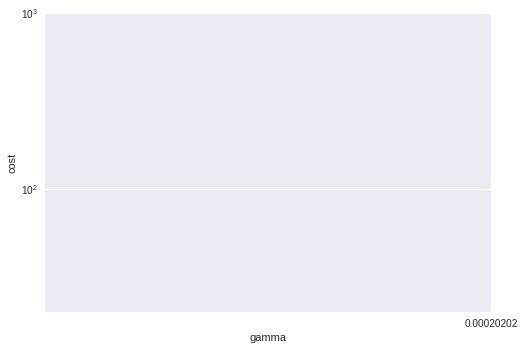

In [49]:
import matplotlib.pyplot as plt

benchmark['ln_cost'] = np.log(benchmark.cost)

fig, ax = plt.subplots()

ax.plot(benchmark['gamma'], benchmark['ln_cost'], linewidth=50, visible=True, alpha=1)
plt.xlabel('gamma')
plt.ylabel('cost')

plt.xlim([0.02, 0.00001])
plt.ylim([20, 1000])
plt.yscale('log')

plt.show()

In [9]:
np.linspace(0,0.1,100)[:-1]

array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
       0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091,
       0.01010101, 0.01111111, 0.01212121, 0.01313131, 0.01414141,
       0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192,
       0.02020202, 0.02121212, 0.02222222, 0.02323232, 0.02424242,
       0.02525253, 0.02626263, 0.02727273, 0.02828283, 0.02929293,
       0.03030303, 0.03131313, 0.03232323, 0.03333333, 0.03434343,
       0.03535354, 0.03636364, 0.03737374, 0.03838384, 0.03939394,
       0.04040404, 0.04141414, 0.04242424, 0.04343434, 0.04444444,
       0.04545455, 0.04646465, 0.04747475, 0.04848485, 0.04949495,
       0.05050505, 0.05151515, 0.05252525, 0.05353535, 0.05454545,
       0.05555556, 0.05656566, 0.05757576, 0.05858586, 0.05959596,
       0.06060606, 0.06161616, 0.06262626, 0.06363636, 0.06464646,
       0.06565657, 0.06666667, 0.06767677, 0.06868687, 0.06969697,
       0.07070707, 0.07171717, 0.07272727, 0.07373737, 0.07474

In [12]:
2**10

1024

## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)

# What you need to know about derivatives for this



In [7]:
class A: 
  def __init__(self, p, q, r=5): 
    self.p = p
    self.q = q
    self.r = r
    self.s = p ** q / r
  
  def getvals(self): 
    print(self.p, self.q, self.r, self.s)
    return (self.p,self.q,self.r,self.s)

aaaaaa = A(1,2)

aaaaaa.getvals()

1 2 5 0.2


(1, 2, 5, 0.2)